In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
silo_path = '../inputs/silos_ilmenard/silos_ilmenard.shp'
parcel_path = '../inputs/parcels_ilmenard/parcels_ilmenard.shp'

In [4]:
silo_df = gpd.read_file(silo_path)
parcel_df = gpd.read_file(parcel_path)

In [5]:
silo_df.head()

,DIAMETER,geometry
0,5.970181,"POLYGON ((-89.761038140355 40.11017998598363, ..."
1,5.782834,"POLYGON ((-89.7610309374848 40.110121105254, -..."
2,4.725118,"POLYGON ((-89.76101939039121 40.1101153080984,..."
3,10.958176,"POLYGON ((-89.7645452732458 40.11338562571487,..."
4,8.454480,"POLYGON ((-89.7647079257188 40.11342932677454,..."


In [34]:
parcel_df.head()

,OGC_FID,PARCELNUMB,PARCEL_NUM,ALTERNATE_,TOWNSHIP,TOWNSHIP_N,SITE_CSZ,GROSS_ACRE,HOMESITE_A,FARM_ACRES,...,RVT_FLAG,CITY,COUNTY,GEOID,STATE,FID,PATH,ACRES,SQFT,geometry
0,9999,U/I,None,None,None,None,None,NaN,NaN,NaN,...,None,fancy-prairie-no-3,menard,17129,il,9999,/us/il/menard/fancy-prairie-no-3/9999,0.04,1801.0,POLYGON ((-89.59984228998277 39.99621069681282...
1,2998,U/I,None,None,None,None,None,NaN,NaN,NaN,...,None,petersburg-east-no-13,menard,17129,il,2998,/us/il/menard/petersburg-east-no-13/2998,0.03,1478.0,POLYGON ((-89.83210357890695 39.99015144928946...
2,6641,12-27-400-022,None,None,None,None,None,NaN,NaN,NaN,...,None,athens-north-no-2,menard,17129,il,6641,/us/il/menard/athens-north-no-2/6641,2.17,94653.0,POLYGON ((-89.75191577222456 39.98237372238361...
3,8338,11-14-218-005,None,None,None,None,None,NaN,NaN,NaN,...,None,petersburg-north-no-14,menard,17129,il,8338,/us/il/menard/petersburg-north-no-14/8338,0.01,588.0,"POLYGON ((-89.85153763818347 40.0179303771223,..."
4,2440,11-23-201-064,1123201064,None,11,T18N R7W,None,1.14,1.14,0.0,...,N,petersburg-south-no-15,menard,17129,il,2440,/us/il/menard/petersburg-south-no-15/2440,1.14,49481.0,POLYGON ((-89.84594642998294 39.99943392351625...


In [33]:
parcel_df.head().to_csv('/Users/alexk/Desktop/lead_gen/sample_table.csv')

In [7]:
headers = parcel_df.columns

print(headers)

#for i in parcel_df.columns:
    
#    print parcel_df[i].unique()

Index(['OGC_FID', 'PARCELNUMB', 'PARCEL_NUM', 'ALTERNATE_', 'TOWNSHIP',
       'TOWNSHIP_N', 'SITE_CSZ', 'GROSS_ACRE', 'HOMESITE_A', 'FARM_ACRES',
       'LASS', 'TAX_STATUS', 'LOT_DIMENS', 'OWNER1_ID', 'DOCUMENT_N',
       'OWNER1_ADD', 'OWNER1__01', 'OWNER1_CSZ', 'OWNER2_ID', 'DOCUMEN_01',
       'OWNER2_ADD', 'OWNER2__01', 'OWNER2_CSZ', 'LEGAL', 'DATE_OF_SA',
       'MAILTO_NAM', 'MAILTO__01', 'MAILTO_ADD', 'HEL_FLAG', 'MAILTO_CSZ',
       'HIS_FLAG', 'HIE_FLAG', 'HES_FLAG', 'HEP_FLAG', 'FAF_FLAG', 'VEZ_FLAG',
       'VET_FLAG', 'XMPT_FLAG', 'SAF_FLAG', 'DRN_FLAG', 'ASSESSED_L',
       'FARM_LAND', 'FARM_BUILD', 'NON_FARM_L', 'NON_FARM_B', 'TAX_BILLED',
       'TAX_CODE', 'CURRENT_AS', 'CURRENT_01', 'PY_NON_FAR', 'PY_NON__01',
       'PY_FARM_LA', 'PY_FARM_BL', 'TAXBILL_NA', 'TAXBILL_01', 'TAXBILL_AD',
       'TAXBILL_CS', 'TAXBILL_YE', 'TAXBILL_RA', 'TAXBILL_TA', 'INSTALL_1_',
       'INSTALL_01', 'INSTALL_2_', 'PRIOR_TAXB', 'PRIOR_T_01', 'PRIOR_T_02',
       'OWNER1_DOC', 'OWNER2_

In [8]:
#for item in parcel_df['OWNER'].unique():
        #print item

In [9]:
parcel_df['OWNER'].nunique()

6250

In [10]:
parcel_df['OWNER'].count()

11839

In [11]:
#parcel_df[parcel_df['OWNER']=='CLAYTON JACOB E']

In [12]:
parcel_df['OWNER'].value_counts().head()

CITY OF PETERSBURG             124
LAKE PETERSBURG ASSOCIATION     89
GRIGSBY FAMILY PARTNERSHIP      67
STATE OF ILLINOIS               66
ILLINOIS & MIDLAND RAILROAD     63
Name: OWNER, dtype: int64

In [13]:
parcel_df['OWNER1_ID'].value_counts().head()

25158    64
25161    37
25372    36
24107    32
18281    29
Name: OWNER1_ID, dtype: int64

In [48]:
farm_parcels_df = parcel_df[parcel_df['FARM_ACRES']>0]
#farm_parcels_df.sort_values(by='FARM_ACRES')

farm_parcels_df.OWNER.nunique()

1645

In [15]:
farm_parcels_by_owner_df = farm_parcels_df[['OWNER','FARM_ACRES','geometry']]

In [16]:
farm_parcels_by_owner_df

owner_farm_acres_sum = farm_parcels_by_owner_df.groupby(['OWNER']).sum()

owner_farm_acres_sum.sort_values(by=['FARM_ACRES'], inplace=True, ascending=False)

owner_farm_acres_sum.head()

,FARM_ACRES
OWNER,
GRIGSBY FAMILY PARTNERSHIP,4738.60
AG HOLDINGS PLUS LLC,2362.88
LOZIER JOHN G,2038.40
KINCAID MARGARET G TRUSTEE,1874.83
THOMAS MICHAEL & KEVIN CO-EXEC,1279.62


In [17]:
owner_farm_acres_and_geom = farm_parcels_by_owner_df.dissolve(by='OWNER', aggfunc='sum')

In [18]:
owner_farm_acres_and_geom.sort_values(by=['FARM_ACRES'], inplace=True, ascending=False)

In [35]:
owner_farm_acres_and_geom

,geometry,FARM_ACRES
OWNER,,
GRIGSBY FAMILY PARTNERSHIP,(POLYGON ((-89.98987808275918 39.9599203194489...,4738.600
AG HOLDINGS PLUS LLC,POLYGON ((-89.94284543834623 39.97806623107908...,2362.880
LOZIER JOHN G,"(POLYGON ((-89.6772670374137 40.126110352976, ...",2038.400
KINCAID MARGARET G TRUSTEE,(POLYGON ((-89.67500412580851 39.9900833522892...,1874.830
THOMAS MICHAEL & KEVIN CO-EXEC,(POLYGON ((-89.9385960401813 40.07580363987313...,1279.620
SCHIRDING FARMS INC,(POLYGON ((-89.8564364484931 40.02466458184699...,1271.910
TODD JAMES H TRUSTEE,(POLYGON ((-89.59799413510019 39.9977536072325...,1227.540
TUCKER ANN P & RONALD J,(POLYGON ((-89.79095985519128 40.1286839017861...,1161.190
SCHIRDING JOHN HARRY & HENRY TRUSTEES,(POLYGON ((-89.88704830448364 40.0616934260195...,1156.810


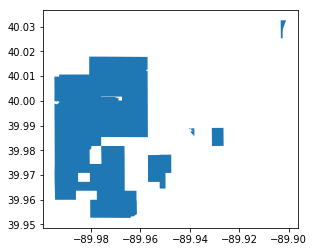

In [19]:
largest_farm = owner_farm_acres_and_geom.head(1)

largest_farm.plot()


In [20]:
silo_farm_matches = gpd.sjoin(silo_df, largest_farm)

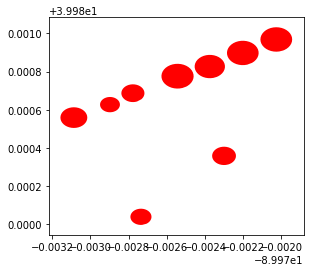

In [21]:
silo_farm_matches.plot(color='red')

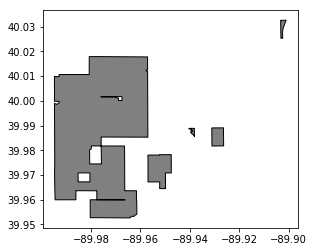

In [22]:
base = largest_farm.plot(color='gray', edgecolor='black')

In [23]:
silo = silo_farm_matches.plot(ax=base)

<Figure size 432x288 with 0 Axes>

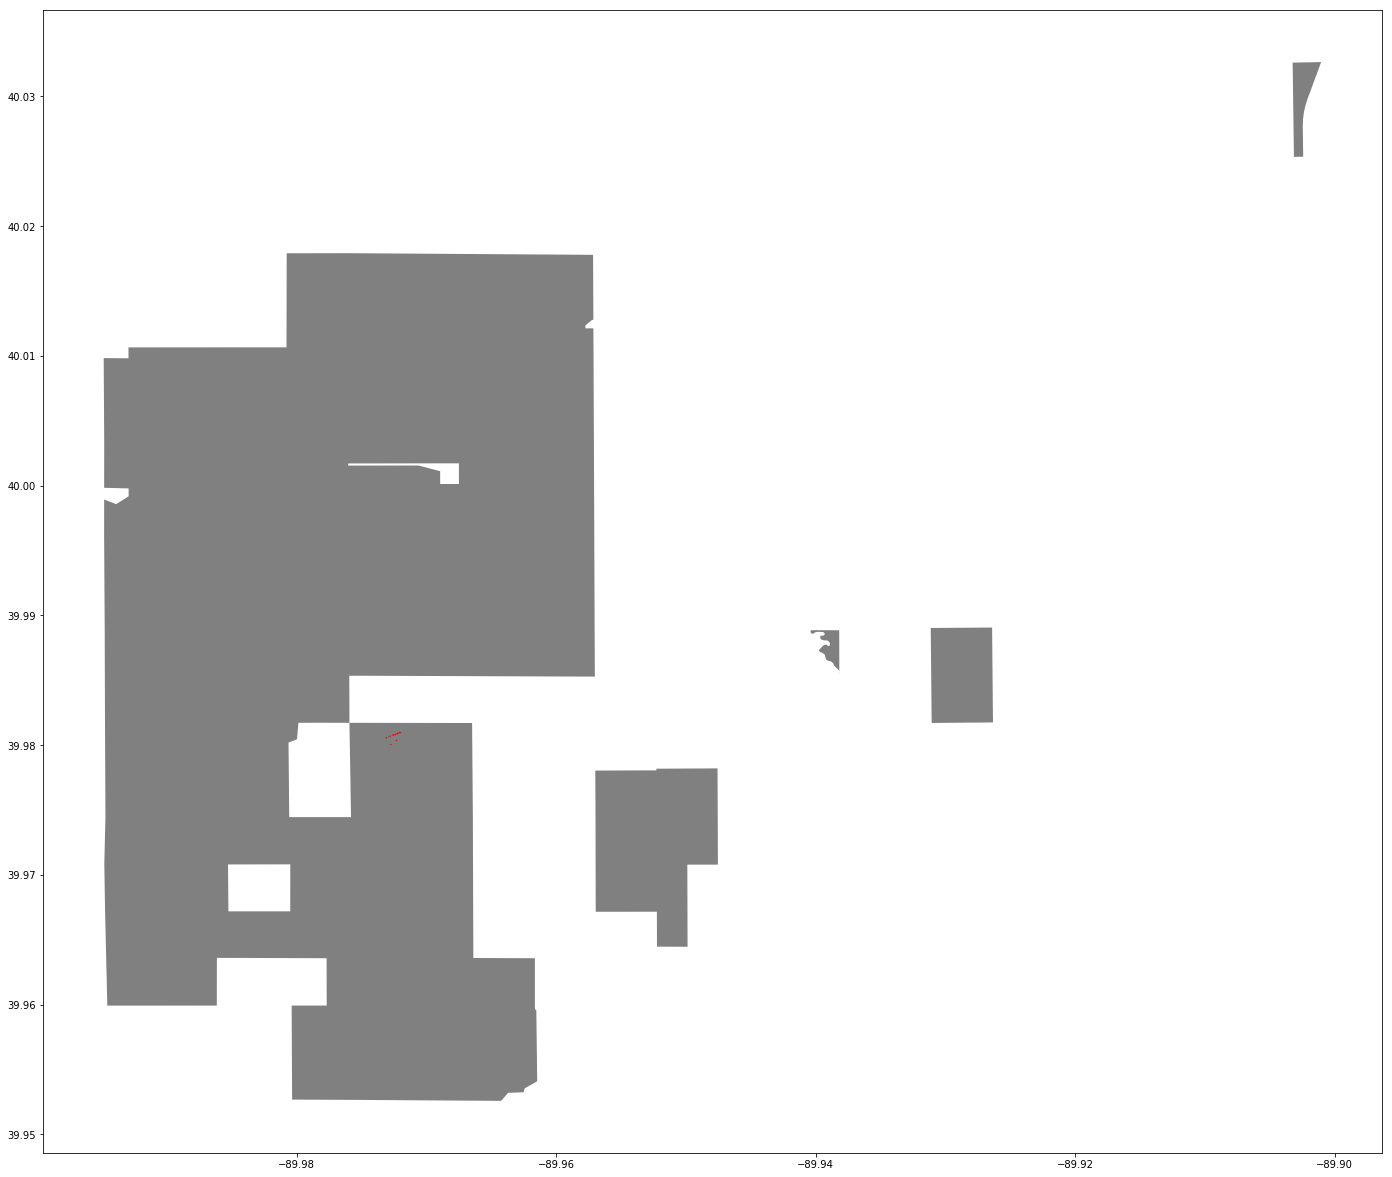

In [24]:
f, ax = plt.subplots(1, figsize=(24, 24))
largest_farm.plot(ax=ax, color='grey')
silo_farm_matches.plot(ax=ax, color='red')
plt.show()

In [25]:
#OWNER MAY HAVE SILO ON LAND THAT DOES NOT HAVE FARM ACREAGE

#parcel_df[parcel_df['OWNER'].isin(owner_farm_acres_sum.OWNER.tolist())]

#select unique OWNER values that own farm land
    # select all their parcels (even if not including farm land - maybe only if >70% of parcels are farmed - 'farmer confidence metric')
    # spatial match between this parcel subset and silos
    #screen for silo/circles that are 4-20m in diameter and in groups of 3 or more
    # silos - look at diameter
    # pull heights based on diameter (using ancillary data source)
    
    
#include lookup table to pull heights based on diameter (maybe create dummy dictionary to store value)
###maybe look into pulling info (or sample info) from the linked catalogue




In [28]:
parcel_df.columns

Index(['OGC_FID', 'PARCELNUMB', 'PARCEL_NUM', 'ALTERNATE_', 'TOWNSHIP',
       'TOWNSHIP_N', 'SITE_CSZ', 'GROSS_ACRE', 'HOMESITE_A', 'FARM_ACRES',
       'LASS', 'TAX_STATUS', 'LOT_DIMENS', 'OWNER1_ID', 'DOCUMENT_N',
       'OWNER1_ADD', 'OWNER1__01', 'OWNER1_CSZ', 'OWNER2_ID', 'DOCUMEN_01',
       'OWNER2_ADD', 'OWNER2__01', 'OWNER2_CSZ', 'LEGAL', 'DATE_OF_SA',
       'MAILTO_NAM', 'MAILTO__01', 'MAILTO_ADD', 'HEL_FLAG', 'MAILTO_CSZ',
       'HIS_FLAG', 'HIE_FLAG', 'HES_FLAG', 'HEP_FLAG', 'FAF_FLAG', 'VEZ_FLAG',
       'VET_FLAG', 'XMPT_FLAG', 'SAF_FLAG', 'DRN_FLAG', 'ASSESSED_L',
       'FARM_LAND', 'FARM_BUILD', 'NON_FARM_L', 'NON_FARM_B', 'TAX_BILLED',
       'TAX_CODE', 'CURRENT_AS', 'CURRENT_01', 'PY_NON_FAR', 'PY_NON__01',
       'PY_FARM_LA', 'PY_FARM_BL', 'TAXBILL_NA', 'TAXBILL_01', 'TAXBILL_AD',
       'TAXBILL_CS', 'TAXBILL_YE', 'TAXBILL_RA', 'TAXBILL_TA', 'INSTALL_1_',
       'INSTALL_01', 'INSTALL_2_', 'PRIOR_TAXB', 'PRIOR_T_01', 'PRIOR_T_02',
       'OWNER1_DOC', 'OWNER2_

In [31]:
farm_parcels_by_owner_df = farm_parcels_df[['OWNER','FARM_ACRES','geometry', 'FARM_LAND', 'FARM_BUILD']]

In [32]:
farm_parcels_by_owner_df

,OWNER,FARM_ACRES,geometry,FARM_LAND,FARM_BUILD
9,SIDWELL MICHAEL & DIANE C,4.320,POLYGON ((-89.99357809628617 40.06687779536268...,104,0
12,BROUGHTON JEFFREY L,4.500,POLYGON ((-89.86092682416272 39.96816864832012...,7485,0
25,ARY LINDA LOU,0.120,POLYGON ((-89.61295335124514 40.08609219688236...,16,0
36,GUM IRENE H,39.290,POLYGON ((-89.91231417610197 39.98547330310801...,22064,1224
38,GROSBOLL JOHN D,3.810,POLYGON ((-89.88526099684678 40.11261605253809...,165,0
77,PRIMM MIKE,9.460,POLYGON ((-89.66553227501973 39.99014076360339...,2727,0
88,MOSS CARRELL,39.880,POLYGON ((-89.94277491537544 39.95888661134139...,4923,0
90,HACKMAN ROBERT W,5.020,POLYGON ((-89.73270060779446 39.97522004598063...,255,0
101,DAVIS M PATRICK & PATRICIA B,9.200,POLYGON ((-89.96610098839857 39.91636839469778...,1470,10042
110,HOLLIS STEPHEN H,40.470,POLYGON ((-89.87392523368433 40.05822874183439...,4423,0


In [38]:
silo_df.DIAMETER.describe()

count    617.000000
mean       8.220424
std        2.570236
min        4.548783
25%        6.143467
50%        7.967643
75%        9.507109
max       23.148655
Name: DIAMETER, dtype: float64

In [44]:
silo_df['unique_id'] = silo_df.index

In [45]:
silo_df

,DIAMETER,geometry,unique_id
0,5.970181,"POLYGON ((-89.761038140355 40.11017998598363, ...",0
1,5.782834,"POLYGON ((-89.7610309374848 40.110121105254, -...",1
2,4.725118,"POLYGON ((-89.76101939039121 40.1101153080984,...",2
3,10.958176,"POLYGON ((-89.7645452732458 40.11338562571487,...",3
4,8.454480,"POLYGON ((-89.7647079257188 40.11342932677454,...",4
5,8.168737,POLYGON ((-89.76480710162004 40.11343606984441...,5
6,8.273727,POLYGON ((-89.76492196367224 40.11343940063824...,6
7,8.475806,"POLYGON ((-89.7650326274786 40.1134367567451, ...",7
8,8.219675,POLYGON ((-89.76513550970466 40.11343733610629...,8
9,5.405831,"POLYGON ((-89.76474632362725 40.1132704627026,...",9
